## Group Assignment RMDA Group A21
Runa Kleppek (63491)  
Jakob Lindner (57322)  
Nour Masmoudi (64458)  
Joao Jin (63631)  

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

1. [Executive Summary](#executive-summary)
2. [Introduction](#introduction)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Test A: Smoking and Insurance Charges](#test-a-smoking-and-insurance-charges)
   - [Method 1: Linear Regression](#method-1-linear-regression)
   - [Method 2: ANOVA Test](#method-2-anova-test)
5. [Test B: BMI and Insurance Charges](#test-b-bmi-and-insurance-charges)
   - [Method 1: Cluster Analysis](#method-1-cluster-analysis)
   - [Method 2: Linear Regression](#method-2-linear-regression)
6. [Conclusion](#conclusion)

# Executive Summary

This project aimed to investigate the relationship between smoking status, BMI, and insurance charges across different age groups. Through exploratory data analysis, linear regression,  ANOVA, and cluster analysis we found significant effects of smoking and age on insurance charges.

**Key Findings:**

**Smoking Status:** Smokers consistently incurred significantly higher insurance charges compared to non-smokers across all age groups.

**Age:** Age was also a significant factor. Older individuals, particularly seniors, tended to have higher insurance charges than younger adults.

**BMI:** While BMI also showed a positive association with insurance charges, the effect was less pronounced compared to smoking and age.

**Implications:**

Insurance providers can use these findings to develop more accurate pricing models and risk assessments.
Public health initiatives aimed at reducing smoking rates and promoting healthy lifestyles could lead to lower healthcare costs.
Policymakers might consider implementing stricter regulations on tobacco products and promoting preventive healthcare measures to address the impact of smoking and obesity on insurance costs.

**Data Import and Setup**
The dataset can be found here:
(https://www.kaggle.com/datasets/mirichoi0218/insurance)  
We also included the dataset in the folder as it only has 55.63 kB

In [ ]:
# Import packages
import numpy as np               # For numerical computations
import pandas as pd              # For data manipulation and analysis
import seaborn as sns            # For statistical data visualization
import matplotlib.pyplot as plt  # For creating visualizations
from scipy import stats          # For statistical tests
import warnings                  # For managing warnings
import statsmodels.api as sm     # For advanced statistical models
from statsmodels.formula.api import ols  # For ordinary least squares regression
from sklearn.cluster import KMeans       # For performing cluster analysis

# Suppress specific warnings related to future updates in Seaborn/Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the insurance dataset
insurance_data = pd.read_csv('insurance.csv')  # Reads the CSV file containing insurance data
insurance_data.head()  # Displays the first few rows of the dataset to understand its structure

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Introduction

**Chosen Variables:**

This dataset contains information on insurance charges, including:

**age:** Age of the individual (int64).
Age is a fundamental variable in healthcare, as older individuals typically require more medical care, leading to higher insurance costs. Analyzing how age correlates with insurance charges allows us to assess how healthcare expenses increase as people age.

**sex:** Gender of the individual (object). Gender may have an impact on insurance charges, as men and women tend to experience different health conditions or medical needs over time. Including sex allows us to identify potential gender disparities in healthcare costs.

**bmi:** Body Mass Index (BMI) of the individual (float64).BMI is an important indicator of overall health, particularly related to obesity. Obesity is a major risk factor for various diseases, including cardiovascular diseases, diabetes, and hypertension, all of which can increase healthcare costs. Therefore, BMI was chosen to evaluate how body weight influences insurance charges.

**charges:** Individual insurance charges (float64).This is the target variable that represents the actual insurance costs. By exploring the relationships between age, sex, bmi, and smoker with charges, we aim to understand the primary factors driving healthcare expenses.

**smoker:** Indicator of whether the individual is a smoker or not (object). Smoking is a well-known risk factor for a range of serious health conditions, including lung cancer, heart disease, and respiratory illnesses, which significantly increase healthcare costs. We included this variable to assess the financial impact of smoking on healthcare expenses.

**Excluded Variables:**

**region:** Geographic region (object). While the region could influence healthcare access and costs due to differences in healthcare infrastructure or cost of living, we excluded it because our primary focus is on personal health-related factors (lifestyle choices like smoking and obesity). Regional differences could obscure the more direct impact of health behaviors on insurance charges.


**children:** Number of children covered by the insurance plan (int64). The number of children covered by the insurance plan may influence costs, but we excluded this variable to keep the analysis focused on the individual’s own health and lifestyle factors. Including children would introduce an additional dimension to the analysis related to family size, which is less relevant to our focus on individual risk factors like smoking and BMI.



 By narrowing the analysis to these key health-related variables, we aim to identify specific lifestyle risk factors that lead to higher healthcare costs, offering insights into how individuals’ choices and characteristics affect insurance charges.










**Research Question:**
  
**How do smoking status and BMI affect insurance charges across different age groups?**

**Hypothesis A:** Smokers incur significantly higher insurance charges than non-smokers, and the difference increases with age.

**Hypothesis B:** Higher BMI is associated with higher insurance charges, and this relationship is independent of age.

**Explanation of Relevance of our Research:**
Our analysis focuses on understanding how smoking status and BMI affect insurance charges, especially across different age groups. While it is commonly known that smoking and a high BMI increase insurance costs, there is still much to learn about how these effects **vary between different age groups**. Understanding these relationships is critical for both insurance companies and healthcare providers. By analyzing these variables, we can offer insights into how certain lifestyle choices and demographic factors influence healthcare costs, which in turn allows insurers to set premiums more accurately. For healthcare providers, such analysis can identify high-risk groups who may benefit from preventive measures, potentially reducing future healthcare expenses. Additionally, as personalized medicine and insurance continue to grow, identifying the factors that drive higher costs across various age groups can help tailor insurance products more effectively, ensuring more equitable and efficient coverage.

**Structure of our Analysis**  
Our analysis is structured around the central research question. To answer this, we developed two hypotheses, each tested using two different methods.

**For Hypothesis A** (the effect of smoking on insurance charges), we first use linear regression to quantify the direct relationship between smoking status and insurance charges across different age groups. This helps us assess whether smoking impacts insurance charges differently depending on the individual's age. We then apply an ANOVA test to compare the average insurance charges between smokers and non-smokers within these age groups, verifying whether the differences in charges between these groups are statistically significant in different age categories.

**For Hypothesis B** (the effect of BMI on insurance charges), we begin with a cluster analysis to group individuals based on similar characteristics related to BMI and insurance charges. This exploratory method helps identify patterns within the data that might not be immediately obvious. After identifying these clusters, we proceed with linear regression to further investigate the specific effect of BMI on insurance charges, controlling for other variables like age and smoking status. We chose to perform cluster analysis first for Hypothesis B because it allows us to explore natural groupings in the data, providing additional context before performing the regression analysis.

This structured approach ensures that we can both quantify direct relationships and uncover underlying patterns in the data, providing a comprehensive analysis of the factors influencing insurance charges.

# Exploratory Data Analysis

This section will use different statistical metrics and visualizations to
describe the dataset and present first descriptive insights. Our exploratory Data Analysis will be used as our foundation and basis for descision making, when choosing the methods we want to use for our hypothesis testing.

We begin with **descriptive statistics** to gain an initial understanding of the data’s central tendencies and variability, allowing us to identify patterns or outliers in our key variables  age, BMI, and insurance charges.

In [ ]:
# Summary statistics for age, BMI, and charges (mean, median, std)
summary_stats = insurance_data[['age', 'bmi', 'charges']].agg(['mean', 'median', 'std'])

# Display statistics for smoker (as it's a categorical variable, we'll count occurrences)
smoker_stats = insurance_data['smoker'].value_counts()

# Output the results
print("Summary Statistics for Age, BMI, and Charges:")
print(summary_stats)

print("\nSmoker Status Distribution:")
print(smoker_stats)

Summary Statistics for Age, BMI, and Charges:
              age        bmi       charges
mean    39.207025  30.663397  13270.422265
median  39.000000  30.400000   9382.033000
std     14.049960   6.098187  12110.011237

Smoker Status Distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64


**Age (int64):**
- The mean age is approximately 39 years, and the median age is also 39, indicating a relatively symmetric distribution for age in the dataset.
- The standard deviation of approximately 14 years suggests a wide range of ages among individuals, which is helpful for analyzing how age groups affect insurance charges.

**BMI: (float64)**
- The mean BMI is around 30.66, and the median BMI is 30.4, which suggests that many individuals in the dataset have BMIs in the overweight or obese range.
- The standard deviation of 6.1 indicates some variability in BMI across individuals, which is crucial for understanding how different body mass indexes might relate to insurance charges.

**Charges: (float64)**
- The mean insurance charges are approximately 13,270 Dollar, while the median charges are 9,382 Dollar. This large gap between the mean and median suggests that there may be outliers (individuals with significantly higher charges), pulling the mean upwards.
- The standard deviation of 12,110 Dollar indicates a very wide variability in insurance costs, which might be linked to factors like smoking, age, and BMI.

We proceed with **frequency plots for categorical variables** to visualize how these different categories are distributed within the dataset. This helps us gain a deeper understanding of the dataset's composition and identify potential patterns or imbalances among groups.

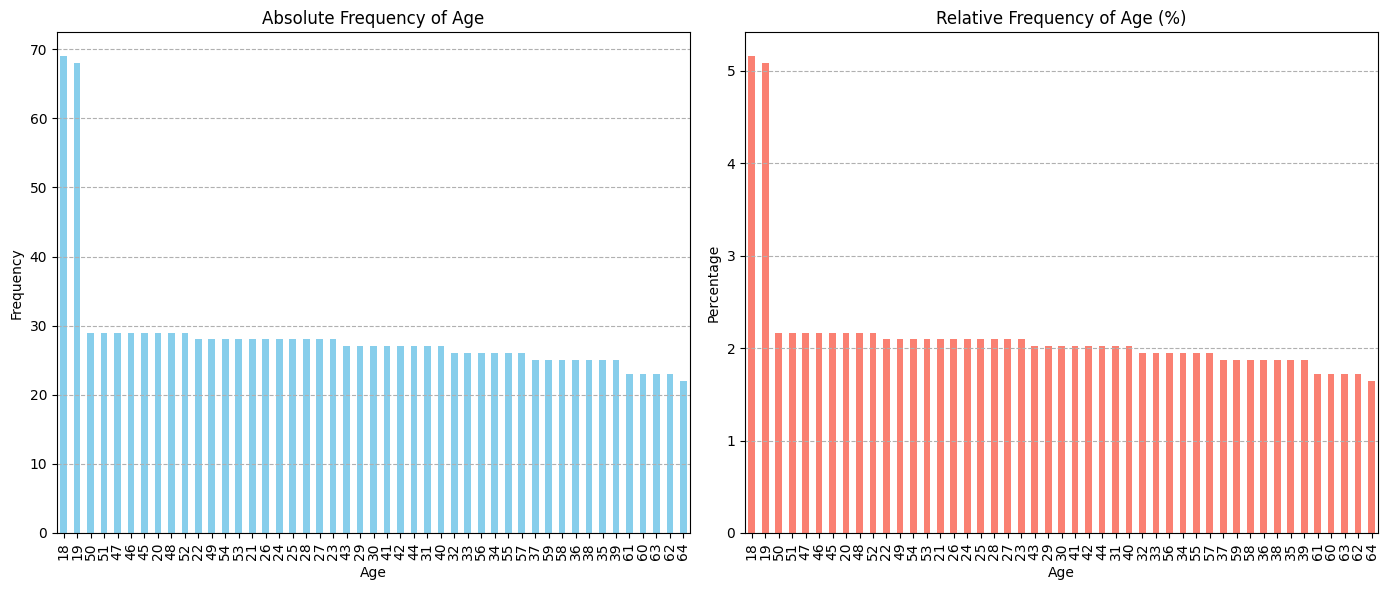

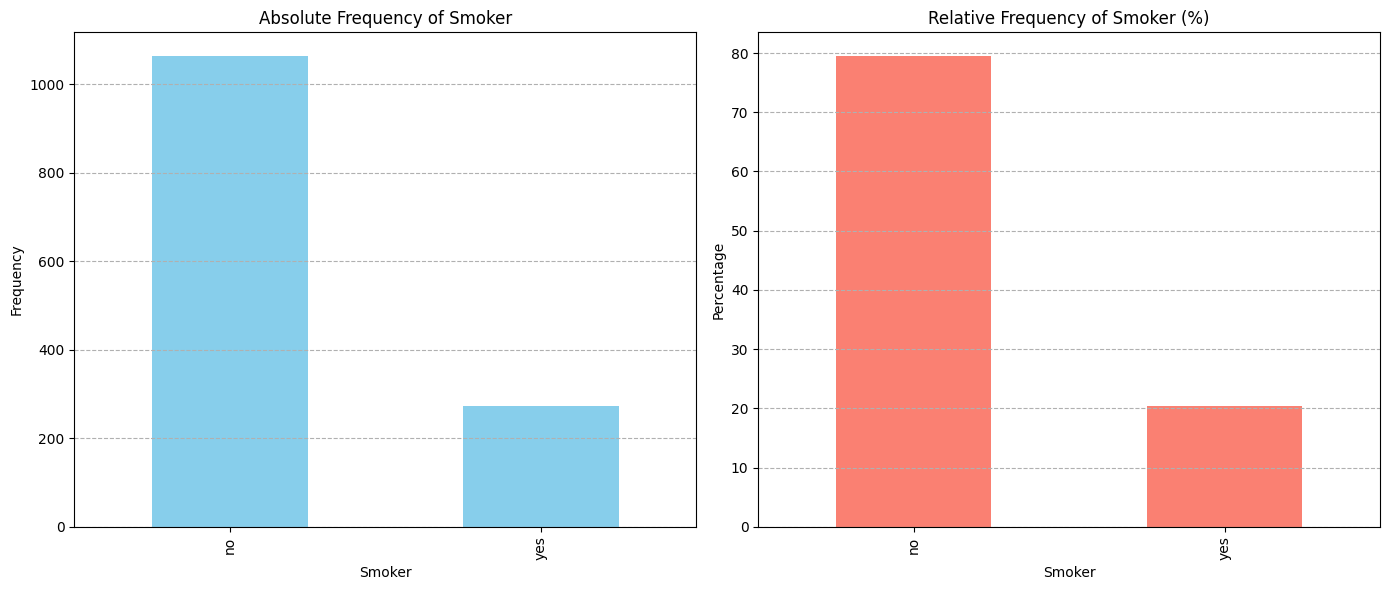

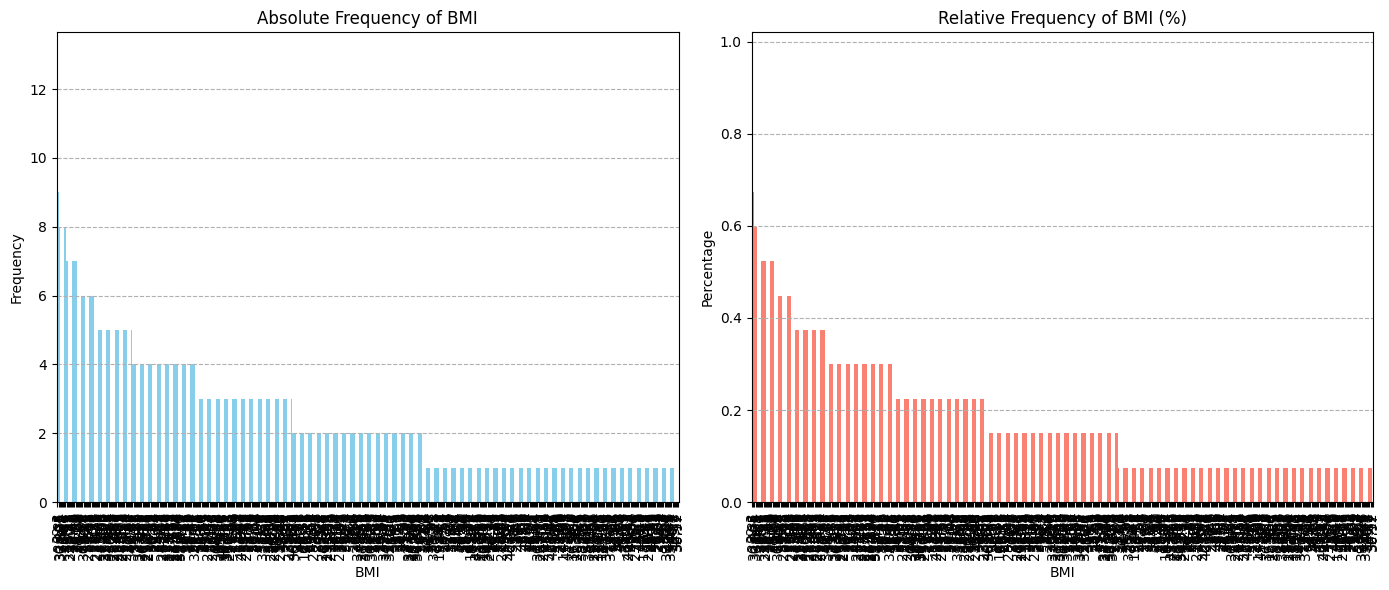

In [ ]:
def plot_frequency(varieble, title):
    # calculate absolute frequency
    abs_freq= insurance_data[varieble].value_counts()

    rel_freq= insurance_data[varieble].value_counts(normalize=True)*100

# Plotting
    plt.figure(figsize=(14, 6))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='salmon')
    plt.title(f'Relative Frequency of {title} (%)')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()

#Plotting for each variebles
plot_frequency('age', 'Age')
plot_frequency('smoker', 'Smoker')
plot_frequency('bmi', 'BMI')


Around 10% of our dataset are below 20 years old, and the rest almost has the same percentage. 80% of the people are non-smokers. In terms of age, they are basically equally distributed, 50% each.

Next we are calculating and plotting the average insurance charges for age, smoking status, and BMI categories to explore how these key variables affect insurance costs. This helps to visually identify patterns or trends, which is helpful for answering our research question and testing the hypotheses.    
We chose these BMI categories (underweight: <18.5, normal: 18.5–24.9, overweight: 25–29.9, obese: 30 and above) based on WHO guidelines, as they align with widely accepted health classifications, making it easier to interpret the impact on insurance charges








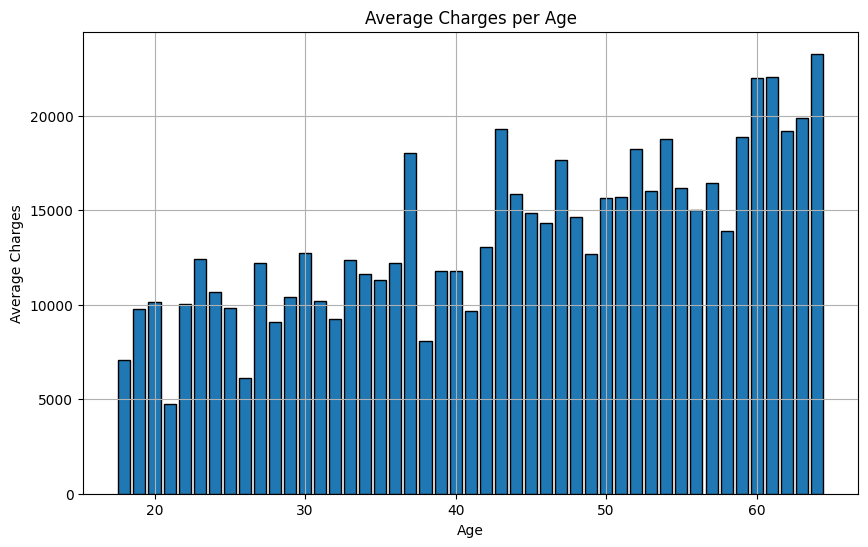

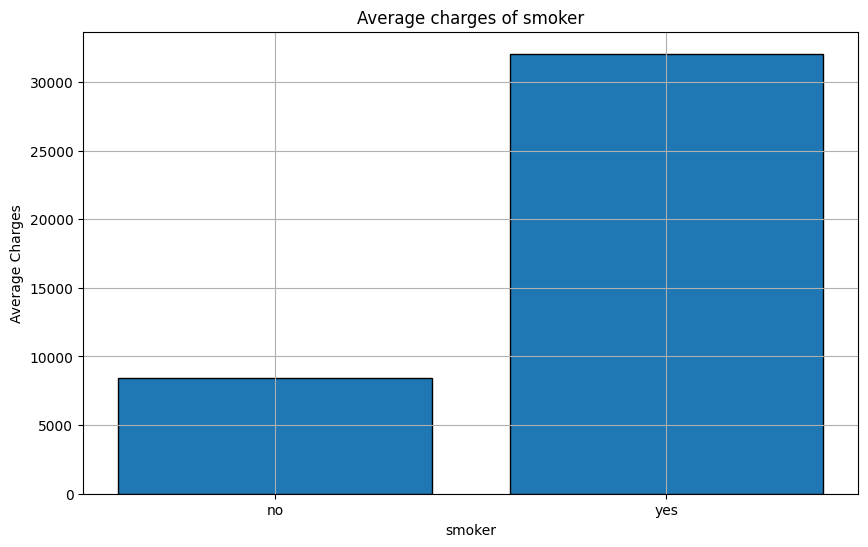

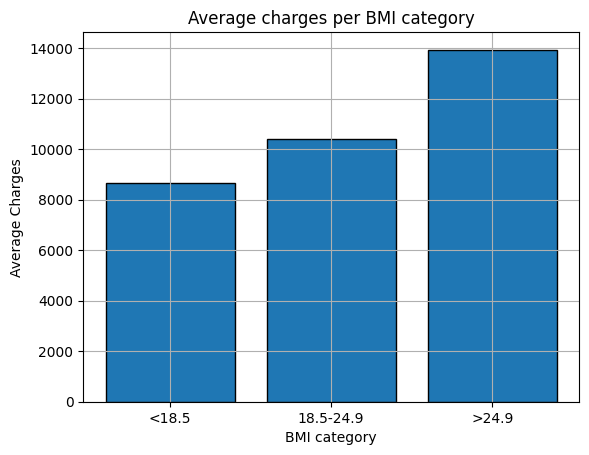

In [ ]:
# Calculate the average charges for each age
average_charges_per_age = insurance_data.groupby('age')['charges'].mean()

# Plotting the bar chart of the average charges per age
plt.figure(figsize=(10,6))
plt.bar(average_charges_per_age.index, average_charges_per_age, edgecolor='black')
plt.title('Average Charges per Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

# Calculate the average charges for smoker
average_charges_of_smoker = insurance_data.groupby('smoker')['charges'].mean()
# Plotting the bar chart of the average charges of smoker
plt.figure(figsize=(10,6))
plt.bar(average_charges_of_smoker.index, average_charges_of_smoker, edgecolor='black')
plt.title('Average charges of smoker')
plt.xlabel('smoker')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

# Adding a new column 'bmi_category' to categorize the BMI values
insurance_data['bmi_category'] = pd.cut(insurance_data['bmi'], bins=[0, 18.5, 24.9, float('inf')], labels=['<18.5', '18.5-24.9', '>24.9'])

# Calculate the average charges for categorized BMI value
average_charges_per_bmi_category = insurance_data.groupby('bmi_category')['charges'].mean()

# Plotting the bar chart of the average charges per categorized BMI value
plt.bar(average_charges_per_bmi_category.index, average_charges_per_bmi_category, edgecolor='black')

plt.title('Average charges per BMI category')
plt.xlabel('BMI category')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()



By analyzing the bar charts we can conclude that people's health charges increase with their age, which could be due to the increased likelihood of chronic conditions and more frequent medical care needs as people get older. Comparing smokers to non-smokers, it becomes obvious that smokers have higher charges. In the last graph, the people with BMI higher than 24.9, have higher average charges. This could be because higher BMI values are often associated with health risks like obesity, which can lead to higher medical costs for treatments and management of related health conditions.






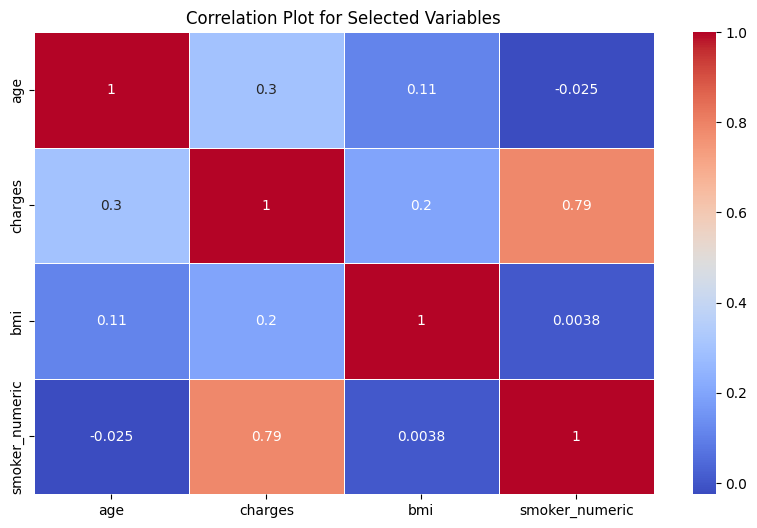

In [ ]:
# Select relevant columns for correlation analysis
columns_to_analyze = ['age', 'charges', 'bmi']

# Convert categorical columns like 'sex' and 'smoker' into numerical format for correlation
insurance_data['smoker_numeric'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})

# Add these to the list of columns to analyze
columns_to_analyze.extend(['smoker_numeric'])

# Calculate correlation
correlation_matrix = insurance_data[columns_to_analyze].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Selected Variables')
plt.show()

Based on correlation plot, charges and smoker have a strong positive correlationship. That means that if a person is smoker, its charges will also be higher than normal standard. Smoking likely leads to health complications that increase the need for medical care, thus driving up costs. Age and BMI have a moderate positive correlationship with the insurance charges.

In the next step, a new column named "age_group" will be added to the dataset. It splits the observations into three age groups which can then be easier interpreted and visualized. This categorization will help in identifying potential patterns or trends across different age ranges which will provide a better analysis and more insights.

In [ ]:
# Function to categorize age into life stages
def age_group(age):
    if age <= 30:
        return "Young adults"
    elif age <= 50:
        return "Middle-aged adults"
    else:
        return "Seniors"

# Apply the function to create a new column
insurance_data['age_group'] = insurance_data['age'].apply(age_group)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_numeric,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,>24.9,1,Young adults
1,18,male,33.770,1,no,southeast,1725.55230,>24.9,0,Young adults
2,28,male,33.000,3,no,southeast,4449.46200,>24.9,0,Young adults
3,33,male,22.705,0,no,northwest,21984.47061,18.5-24.9,0,Middle-aged adults
4,32,male,28.880,0,no,northwest,3866.85520,>24.9,0,Middle-aged adults


# Test A: Smoking and Insurance Charges
**H0: There is no significant difference in insurance charges between smokers and non-smokers within each age group.**

Mathematically, for each age group:
H0:𝜇 smokers = 𝜇 non-smokers:  
This means the average insurance charges for smokers are equal to the average insurance charges for non-smokers.

**H1: There is a significant difference in insurance charges between smokers and non-smokers within each age group.**

Mathematically, for each age group:
𝐻1:𝜇 smokers ≠ 𝜇 non-smokers:  
This means the average insurance charges for smokers are different from those of non-smokers.

This is a **two-sample problem** comparing two independent groups (smokers and non-smokers), and we are conducting a **two-sided test** to check for any significant difference in insurance charges between the two groups.

## Method 1: Linear Regression

In this section a linear regression will be conducted in order to check the hypotheses. Using this model, the impact of each independet varible can be clearly interpreted. In the first step, the model will be set up using the statsmodels module.


In [ ]:
# Linear Regression for H1

# import libraries
import pandas as pd
import statsmodels.formula.api as smf

# Fit the linear regression model
model_1 = smf.ols(formula= 'charges ~ age_group + smoker', data=insurance_data)
results_1 = model_1.fit()

# Print the regression results summary
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:41:06   Log-Likelihood:                -13647.
No. Observations:                1338   AIC:                         2.730e+04
Df Residuals:                    1334   BIC:                         2.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

These regression results can be interpreted as follows:
The intercept value is 8168.1458. Since age_group is a dummy variable, this means that the intercept is the expected value for the age_group not listed in the regression table, in this case Middle-aged adults who do not smoke. You can say that Middle-aged adults who do not smoke have an average individual medical costs billed by health insurance of around 8168 USD. If the person is a Senior the insurance cost will increase, on average, by 5616.9388 USD. If the person is a Young adult the insurance cost will decrease, on average, by 3888.2285 USD. If the person is a smoker, the insurance cost will increase by approximately 23920 USD.

The R-squared value of 0.711 show that 71.1% of the variability in charges is explained by the independent variables (age group and smoker).

The very low p-value of close to zero show that the OLS model is statistically significant which means that the predictor variables (age group and smoker) significantly explain the variation in charges.

With these interpretations, the hypothesis H1 can be considered true. Being a smoker has the largest impact on insurance charges, with smokers paying significantly more than non-smokers. The age also has an effect on insurance charges, while older people pay more than younger people.

**Checking Model Assumptions**

To check whether your linear regression model fulfills the assumptions of linear regression, we need to validate the following assumptions:

**Linearity**: The relationship between the independent and dependent variables should be linear.
Homoscedasticity: The residuals (errors) should have constant variance.

**Normality of Residuals:** The residuals should be normally distributed.

**No Multicollinearity:** Independent variables should not be highly correlated with each other.

**Independence of Errors:** The residuals should be independent from each other.

We can test these assumptions using diagnostic plots and statistical tests.

In [ ]:
# Making Predictions

pred_insample = results_1.predict() # or results.fittedvalues

# out of sample prediction
#pred_outofsample = results.predict(new_data_set)


# add predictions to the data frame
insurance_data['predictions'] = results_1.predict()
insurance_data['residuals'] = results_1.resid # computing residuals (i.e., actual - predicted values)
insurance_data

,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_numeric,age_group,predictions,residuals
0,19,female,27.900,0,yes,southwest,16884.92400,>24.9,1,Young adults,28198.126077,-11313.202077
1,18,male,33.770,1,no,southeast,1725.55230,>24.9,0,Young adults,4279.917288,-2554.364988
2,28,male,33.000,3,no,southeast,4449.46200,>24.9,0,Young adults,4279.917288,169.544712
3,33,male,22.705,0,no,northwest,21984.47061,18.5-24.9,0,Middle-aged adults,8168.145758,13816.324852
4,32,male,28.880,0,no,northwest,3866.85520,>24.9,0,Middle-aged adults,8168.145758,-4301.290558
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,>24.9,0,Middle-aged adults,8168.145758,2432.402542
1334,18,female,31.920,0,no,northeast,2205.98080,>24.9,0,Young adults,4279.917288,-2073.936488
1335,18,female,36.850,0,no,southeast,1629.83350,>24.9,0,Young adults,4279.917288,-2650.083788
1336,21,female,25.800,0,no,southwest,2007.94500,>24.9,0,Young adults,4279.917288,-2271.972288


Text(0.5, 1.0, 'Actual vs. Predicted')

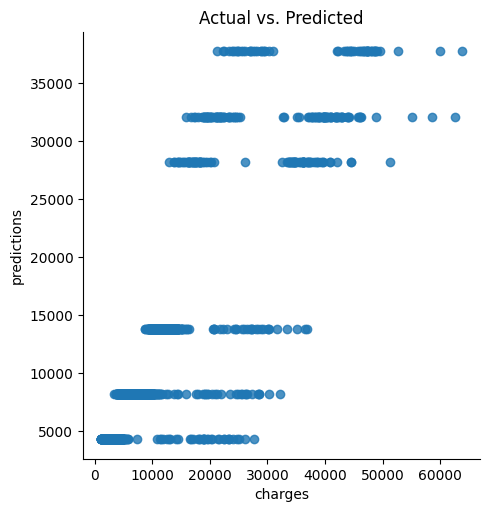

In [ ]:
# Linearity
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
sns.lmplot(x='charges', y='predictions', data=insurance_data, fit_reg=False)
plt.title('Actual vs. Predicted')

In a perfect model, the predicted values would match the actual values, and all points would lie on a 45-degree line. In the plot for Model 1, the points are scattered, and you cannot see a clear linear relationship between the actual and predicted values. Additionally, there are some clusters of predicted values around certain levels (e.g., around 5000 and 10000). This may be a sign that the model tends to predict certain ranges of insurance charges more often, no matter of the actual values. Therefore, the linearity assumption is not met and there might be other models that capture the relationship of the variables better.

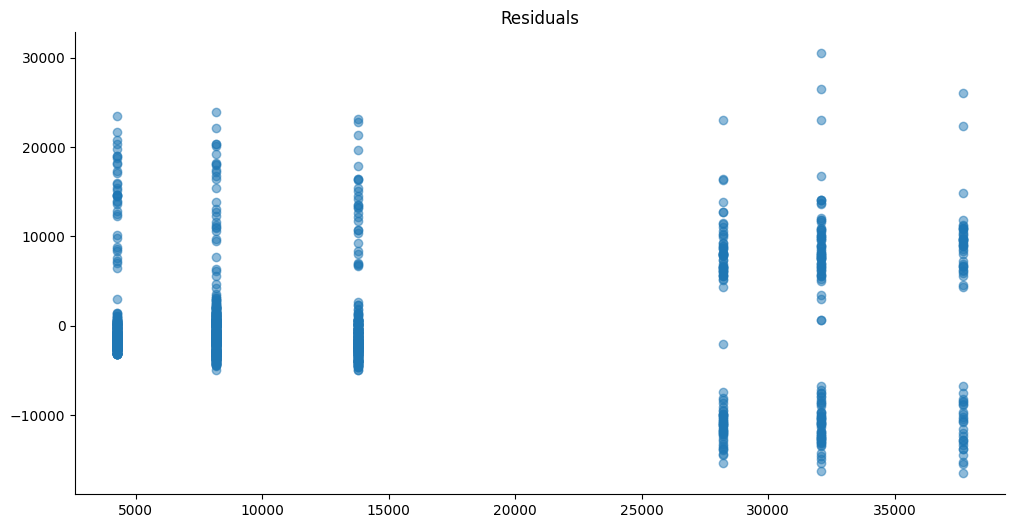

In [ ]:
# Homoscedasticity

# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=insurance_data.predictions, y=insurance_data.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

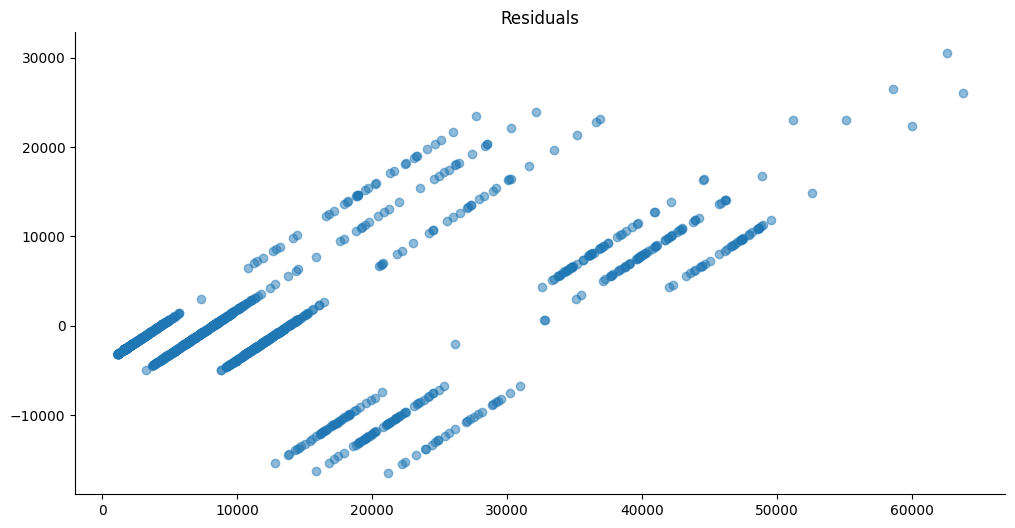

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=insurance_data.charges, y=insurance_data.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

To assess whether the error terms (residuals) have similar variance, you can plot the residuals vs. the predicted and observed values and see if there are odd patters.
In the case of homscedasticity, the residuals would vary equally for all predicted and actual values, i.e., they should follow a line.
As can be seen in the plot, this is not the case for this model. There seems to be clustering of residuals at different predicted value levels (e.g., around 5000 and 10000). Also, the residuals are scattererd above and below zero in a fairly random pattern.

In [ ]:
# Heteroscedasticity robust standard errors
# Fit the linear regression model
model = smf.ols(formula= 'charges ~ age_group + smoker', data=insurance_data)
results = model.fit(cov_type = "HC3") # using heteroscedasticity robust standard errors


# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     536.6
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.14e-228
Time:                        12:41:07   Log-Likelihood:                -13647.
No. Observations:                1338   AIC:                         2.730e+04
Df Residuals:                    1334   BIC:                         2.732e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

HC3 computes a heteroscedasticity robust covariance matrix and uses this matrix for the estimation.
The Standard Errors are heteroscedasticity robust (HC3). This robust approach gives more confidence in the model's results because it balances out potential issues with uneven variance in the residuals.

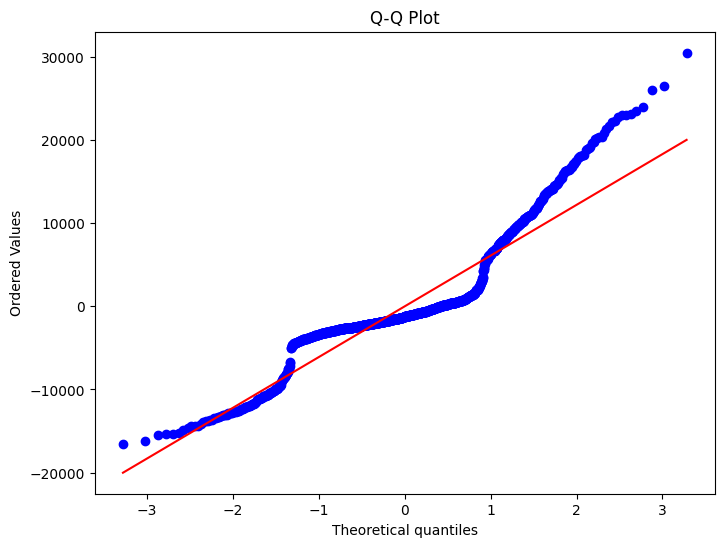

In [ ]:
# Normality of Residuals
import scipy.stats as stats

# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(insurance_data['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot shows that the residuals for smaller and moderate values follow a normal distribution, the larger residuals (>1) have higher deviations, which indicates that the standard errors for larger observations are not normally distributed.

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor                   features
0    2.767956                  Intercept
1    1.220967       age_group[T.Seniors]
2    1.219581  age_group[T.Young adults]
3    1.001394              smoker[T.yes]


We need to test if some variables are linear combinations of other variables. To do so, we compute the variance inflation factor (VIF).

The VIF for all variables is below the threshold of 10 and even below the more conservative threshold of 5. That shows that multicollinearity is not an issue.

In [ ]:
# Independence of Errors (autocorrelation of errors)
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(insurance_data['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.081638753137622


The Durbin-Watson test checks for autocorrelation in residuals. Values between 1.5 and 2.5 are acceptable. Since the result is 2.081638753137622, the value is acceptable and there is no autocorrelation of errors.

After checking the assumptions for linear regression, you can summarize that there are some potential violations, e. g. in homoscedasticity or normality of residuals. However, the model can still be used because linear regression is relatively robust to minor assumption violations, especially with large sample sizes like in this dataset.
Overall, the model provides valuable insights, is easy to interpret and the conclusions remain reliable for practical purposes.

## Method 2: Anova Test

After conducting the regression analysis, which showed the significant effects of smoking status and age group on insurance charges, I will now apply ANOVA (Analysis of Variance) to compare the mean insurance costs between smokers and non-smokers within each age group.

While the regression provided a general overview, ANOVA allows us to test whether the differences in insurance charges between smokers and non-smokers are statistically significant for specific age groups (young adults, middle-aged adults, seniors). This will help to validate and complement the results from the regression analysis, providing more detailed insights into the impact of smoking on insurance costs across different age categories.

**Requirements for ANOVA Test:**

1. **Independence of Samples:** The two groups (smokers and non-smokers) must be independent of each other.
2. **Normality or Large Sample Size:** The distribution should ideally be normal, but if each group has more than 30 observations, the Central Limit Theorem allows for approximate normality
3. **No Extreme Outliers or Strong Skewness:** The data should not have extreme outliers or be strongly skewed, as it could make the mean less reliable. The following code will check if requirements are met:

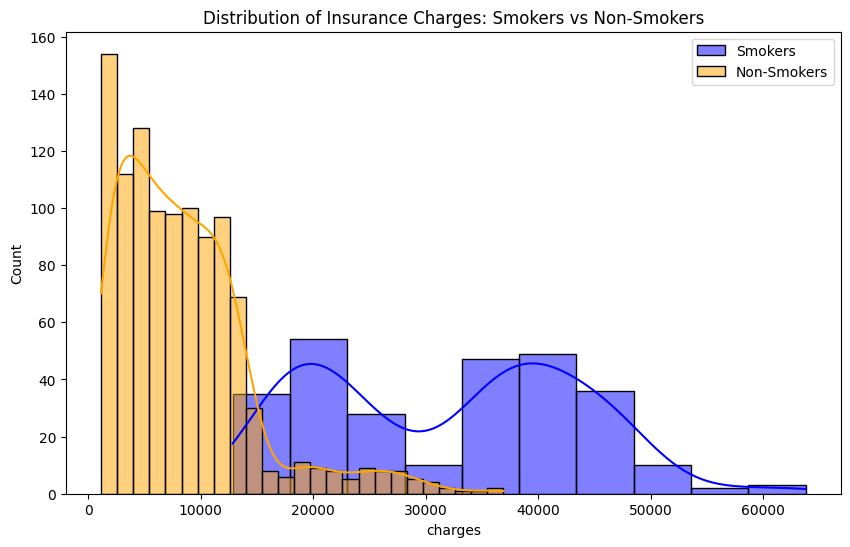

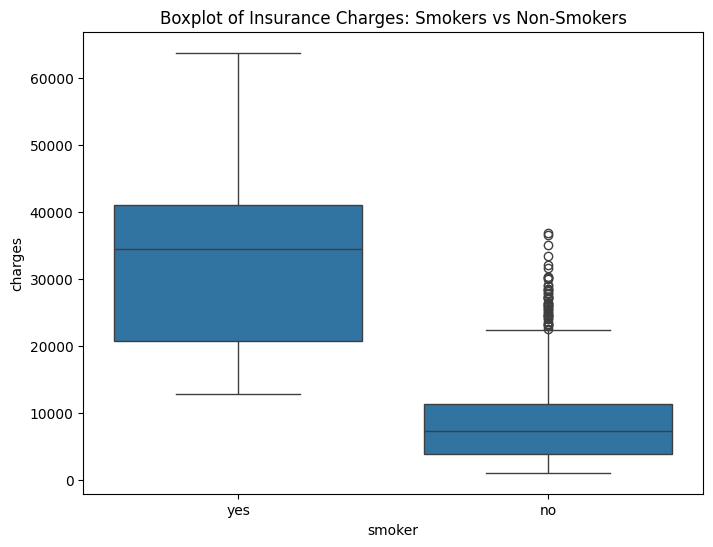

Sample sizes for each group (smoker status by age group):
smoker  age_group         
no      Middle-aged adults    423
        Seniors               292
        Young adults          349
yes     Middle-aged adults    115
        Seniors                64
        Young adults           95
dtype: int64

Skewness for smokers' charges: 0.12821727537875743
Skewness for non-smokers' charges: 1.5381200362088072


In [ ]:
# Check sample size for each group (smokers and non-smokers by age group)
group_counts = insurance_data.groupby(['smoker', 'age_group']).size()
# Check skewness to evaluate normality (smokers and non-smokers)
smokers_charges = insurance_data[insurance_data['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_data[insurance_data['smoker'] == 'no']['charges']
smokers_skewness = smokers_charges.skew()  # Skewness for smokers
non_smokers_skewness = non_smokers_charges.skew()  # Skewness for non-smokers
# Plot distribution (histogram and KDE) to visually check for skewness and distribution shape
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance_data[insurance_data['smoker'] == 'yes'], x='charges', kde=True, color='blue', label='Smokers')
sns.histplot(data=insurance_data[insurance_data['smoker'] == 'no'], x='charges', kde=True, color='orange', label='Non-Smokers')
plt.legend()
plt.title('Distribution of Insurance Charges: Smokers vs Non-Smokers')
plt.show()
# Check for outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_data)
plt.title('Boxplot of Insurance Charges: Smokers vs Non-Smokers')
plt.show()
# Print sample sizes and skewness
print("Sample sizes for each group (smoker status by age group):")
print(group_counts)
print(f"\nSkewness for smokers' charges: {smokers_skewness}")
print(f"Skewness for non-smokers' charges: {non_smokers_skewness}")



**Results: Are all requirements met for the ANOVA test?**

**Distribution Characteristics:**
The insurance costs for both smokers and non-smokers show a skewed or possibly bimodal distribution. This is likely due to a small subset of individuals with extremely high insurance costs, often driven by severe health issues, which inflates the mean and distorts normality.

**Why the Distribution is Skewed:**
Insurance costs are right-skewed because a few individuals incur disproportionately high charges, while most have moderate costs. In some cases, a bimodal distribution occurs due to subgroups like smokers with severe conditions and younger or healthier individuals.

**Applying the ANOVA Test Despite Skewness:**
Even though the ANOVA assumes normality, the large sample size (n > 30) allows us to proceed due to the Central Limit Theorem. However, the skewed distribution means the mean may not accurately represent typical insurance costs, so the results should be interpreted with caution.

In [ ]:
# Step 1: Subset data for ANOVA based on age groups (comparing smokers and non-smokers within each age group)

# Run ANOVA for each age group
anova_results = {}

for group in insurance_data['age_group'].unique():
    group_data = insurance_data[insurance_data['age_group'] == group]
    # Use ordinary least squares (OLS) to compare smokers vs. non-smokers
    model = ols('charges ~ C(smoker)', data=group_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[group] = anova_table

anova_results

{'Young adults':                  sum_sq     df           F         PR(>F)
 C(smoker)  3.972848e+10    1.0  907.604662  3.367695e-109
 Residual   1.934762e+10  442.0         NaN            NaN,
 'Middle-aged adults':                  sum_sq     df            F         PR(>F)
 C(smoker)  5.135269e+10    1.0  1235.021576  3.215521e-141
 Residual   2.228709e+10  536.0          NaN            NaN,
 'Seniors':                  sum_sq     df           F        PR(>F)
 C(smoker)  3.354788e+10    1.0  797.112989  1.153693e-92
 Residual   1.489870e+10  354.0         NaN           NaN}

**Explanation of the ANOVA Results:**

The ANOVA test was conducted to compare the mean insurance charges between smokers and non-smokers within each age group. Here are the detailed results:

1. Young Adults (≤ 30 years)
•	F-statistic: 907.60
•	p-value: 3.37×10−1093.37 \times 10^{-109}3.37×10−109

Interpretation: There is a statistically significant difference in insurance charges between smokers and non-smokers within the young adult group. The extremely small p-value indicates that this difference is highly unlikely to be due to random chance. However, due to the skewed distribution, the mean charges may not represent the typical costs for the majority of individuals in this age group.The high F-statistic (907.60) indicates a substantial difference in insurance charges between smokers and non-smokers, with this variance far outweighing the variability within each group.

2. Middle-aged Adults (31-50 years)
* F-statistic: 1235.02
* p-value: 3.22×10−1413.22 \times 10^{-141}3.22×10−141

Interpretation: Similarly, there is a highly significant difference in insurance charges between smokers and non-smokers in the middle-aged group. The p-value suggests that smokers in this age group tend to have much higher insurance costs compared to non-smokers, but again, caution is required due to potential outliers and skewness affecting the mean. The F-statistic of 1235.02 shows an even greater difference in charges between smokers and non-smokers in this group, highlighting a large variance between the two compared to the variance within.

3. Seniors (> 50 years)
* F-statistic: 797.11
* p-value: 1.15×10−921.15 \times 10^{-92}1.15×10−92

Interpretation: The difference in insurance charges between smokers and non-smokers is also statistically significant for seniors. The low p-value strongly suggests a significant difference, but the distribution of costs in seniors is likely highly skewed, with a subset of individuals incurring very high costs. This skews the mean and complicates interpretation. With an F-statistic of 797.11, the difference in charges between smokers and non-smokers is also pronounced for seniors, showing that the between-group variance is significantly larger than the within-group variance.

Caution Due to Distribution:
In all age groups, while the ANOVA results show significant differences, the skewed distribution of insurance charges (especially with some extreme outliers) means that the mean values might not fully capture the typical costs for most individuals. A more robust analysis (e.g., using medians or non-parametric tests) might provide a clearer picture of the actual differences between smokers and non-smokers.

Conclusion:
The ANOVA test confirms that there are significant differences in insurance charges between smokers and non-smokers across all age groups, but the results should be interpreted carefully due to the skewed distribution and potential influence of outliers.



#Test B: BMI and Insurance Charges




**H₀ (Null Hypothesis)**: There is no significant association between BMI and insurance charges, and this relationship is independent of age.
This means that BMI does not significantly affect insurance charges.

**H₁ (Alternative Hypothesis)**: There is a significant association between BMI and insurance charges, independent of age.
This means that higher BMI is associated with higher insurance charges, regardless of age.

## Method 1: Cluster Analysis

Starting with **cluster analysis** allows us to explore the natural groupings within the data based on BMI, age, smoking status, and insurance charges. This helps identify patterns and subgroups that may not be immediately obvious. By understanding these clusters first, we can better inform the subsequent regression analysis, ensuring that the model captures the relationships more effectively and avoids oversimplifying the complex interactions between these variables. In short, cluster analysis serves as a crucial exploratory step to guide a more accurate and tailored regression model.

               bmi        age  smoker_encoded       charges
cluster                                                    
0        29.516937  47.201571        0.306283  16776.535625
1        34.620906  41.251462        0.918129  40141.531590
2        30.359210  34.871338        0.000000   5710.810803


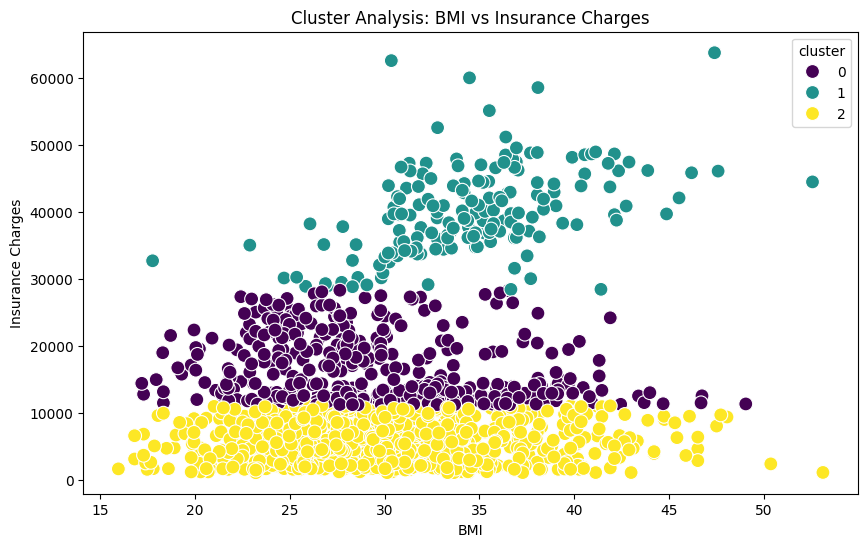

In [ ]:
# Add a new column 'smoker_encoded' without modifying the original 'smoker' column
insurance_data['smoker_encoded'] = insurance_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Select the columns we're going to use in clustering: 'bmi', 'age', 'smoker_encoded', and 'charges'
X = insurance_data[['bmi', 'age', 'smoker_encoded', 'charges']]

# Step 1: Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
insurance_data['cluster'] = kmeans.fit_predict(X)

# Step 2: Analyze the characteristics of each cluster (using only numeric columns)
numeric_columns = ['bmi', 'age', 'smoker_encoded', 'charges']
cluster_summary = insurance_data.groupby('cluster')[numeric_columns].mean()

# Display the cluster summary statistics
print(cluster_summary)

# Step 3: Visualize clusters by plotting BMI vs Charges, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='cluster', data=insurance_data, palette='viridis', s=100)
plt.title('Cluster Analysis: BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()



**Results Interpretation from Cluster Analysis:**

The cluster analysis using BMI, age, smoking status, and insurance charges has grouped individuals into three distinct clusters. Here’s an interpretation of the results based on the characteristics of each cluster:

Cluster 0:
- Average BMI: 29.52
- Average Age: 47.20
- Smoker Proportion: ~30.6%
- Average Insurance Charges: $16,776

Interpretation:
This cluster consists of older individuals with a moderate BMI and moderate insurance charges. A smaller proportion of individuals in this group are smokers, which likely explains the intermediate insurance costs. The combination of moderate age, BMI, and lower smoking proportion contributes to this group's mid-range risk and insurance costs.

Cluster 1:
- Average BMI: 34.62
- Average Age: 41.25
- Smoker Proportion: ~91.8%
- Average Insurance Charges: $40,141

Interpretation:
This cluster includes middle-aged individuals with a higher BMI and the highest proportion of smokers. The combination of high BMI and smoking status explains the significantly higher insurance costs in this group. Smoking appears to be a dominant factor contributing to the high insurance charges, even though the average age is lower than Cluster 0.

Cluster 2:
- Average BMI: 30.36
- Average Age: 34.87
- Smoker Proportion: 0% (non-smokers)
- Average Insurance Charges: $5,710

Interpretation:
This cluster represents younger individuals with a moderate BMI and the lowest insurance charges. The absence of smokers in this group likely contributes to their categorization as low-risk individuals, with significantly lower insurance costs compared to the other clusters.

 **Overall Conclusion:**  
The cluster analysis reveals clear groupings of individuals based on their BMI, age, smoking status, and insurance charges:

**Cluster 0:** Moderate-risk group with a mix of smokers and non-smokers, moderate BMI, and mid-range charges.  
**Cluster 1:** High-risk group with the highest BMI, nearly all smokers, and the highest insurance charges.  
**Cluster 2:** Low-risk group of younger, non-smoking individuals with moderate BMI and the lowest insurance charges.   

This clustering provides valuable insights into how BMI, smoking, and age interact to affect insurance costs. These findings support the hypothesis that higher BMI and smoking are strongly associated with higher insurance charges, while non-smokers in younger age groups incur significantly lower costs. These results will guide further analysis in the linear regression stage, allowing for a deeper exploration of how these factors impact insurance charges.

These BMI clusters do not exactly represent the BMI categories definded by the WHO guidelines (underweight: <18.5, normal: 18.5–24.9, overweight: 25–29.9, obese: 30 and above). This is because the impact on insurance charges is not so high for people with a too low BMI ("underweight"). Whereas for people with a too high BMI ("overweight"), the impact on insurance charges is very high.

## Method 2: Linear Regression

Hypothesis B (H1): Higher BMI is associated with higher insurance charges, and this relationship is independent of age.

To test this hypothesis, a linear regression with charges as dependent variable and bmi and age_group as independent variables will be run.

In [ ]:
# Linear Regression for H2

# import libraries
import pandas as pd
import statsmodels.formula.api as smf

# Fit the linear regression model
model_H2 = smf.ols(formula= 'charges ~ age_group + bmi', data=insurance_data)
results_2 = model_H2.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     536.6
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.14e-228
Time:                        12:41:09   Log-Likelihood:                -13647.
No. Observations:                1338   AIC:                         2.730e+04
Df Residuals:                    1334   BIC:                         2.732e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The intercept value is 3003.5177. Since age_group is a dummy variable, this means that the intercept is the expected value for the age_group not listed in the regression table, in this case, Middle-aged adults. You can say that Middle-aged adults with a BMI of zero (which is not possible in reality) have average individual medical costs billed by health insurance of around 3003 USD. But this value is not statistically significant (p-value = 0.071). If the person is a Senior, the insurance cost will increase, on average, by 4438.2891 USD. If the person is a Young adult, the insurance cost will decrease, on average, by 3640.7318 USD. Additionally, for every 1 unit increase in BMI, the insurance cost will increase by approximately 335.7146 USD.

The R-squared value of 0.104 shows that only 10.4% of the variability in charges is explained by the independent variables (age group and BMI). This value is very low which means that there must be many other factors that impact the insurance charges that are not captured by the model.

The very low p-value (close to zero) for the overall model shows that the OLS model is statistically significant, meaning that the predictor variables (age group and BMI) significantly explain the variation in charges.

With these interpretations, the hypothesis H2 can be considered partially true. Higher BMI is associated with higher insurance charges, with an increase in BMI resulting in higher charges regardless of the age group. However, age still plays an important role, as Seniors pay significantly more, while Young adults pay less than Middle-aged adults so it is not independent of age.



In [ ]:
# Making Predictions

pred_insample = results_2.predict() # or results.fittedvalues

# out of sample prediction
#pred_outofsample = results.predict(new_data_set)


# add predictions to the data frame
insurance_data['predictions'] = results_2.predict()
insurance_data['residuals'] = results_2.resid # computing residuals (i.e., actual - predicted values)
insurance_data

,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_numeric,age_group,predictions,residuals,smoker_encoded,cluster
0,19,female,27.900,0,yes,southwest,16884.92400,>24.9,1,Young adults,8729.222937,8155.701063,1,0
1,18,male,33.770,1,no,southeast,1725.55230,>24.9,0,Young adults,10699.867586,-8974.315286,0,2
2,28,male,33.000,3,no,southeast,4449.46200,>24.9,0,Young adults,10441.367351,-5991.905351,0,2
3,33,male,22.705,0,no,northwest,21984.47061,18.5-24.9,0,Middle-aged adults,10625.917460,11358.553150,0,0
4,32,male,28.880,0,no,northwest,3866.85520,>24.9,0,Middle-aged adults,12698.955060,-8832.099860,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,>24.9,0,Middle-aged adults,13400.598556,-2800.050256,0,2
1334,18,female,31.920,0,no,northeast,2205.98080,>24.9,0,Young adults,10078.795593,-7872.814793,0,2
1335,18,female,36.850,0,no,southeast,1629.83350,>24.9,0,Young adults,11733.868527,-10104.035027,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,>24.9,0,Young adults,8024.222295,-6016.277295,0,2


In the table above you can see the predcited values for charges made my the linear regression model. In the next step, the model assuumptions for a linear regression will be checked - just like for the previous linear regression.

Text(0.5, 1.0, 'Actual vs. Predicted')

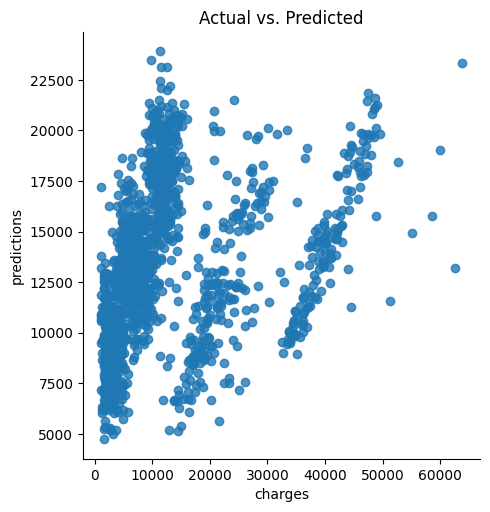

In [ ]:
# Linearity
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
sns.lmplot(x='charges', y='predictions', data=insurance_data, fit_reg=False)
plt.title('Actual vs. Predicted')

Regarding linearity you can say that there is no clear linear relationship. The scatterplot of actual versus predicted values shows that the points are widely dispersed and not forming a concentrated pattern around a straight line. Therefore, the linearity assumption is not met and there might be other models that capture the relationship of the variables better.

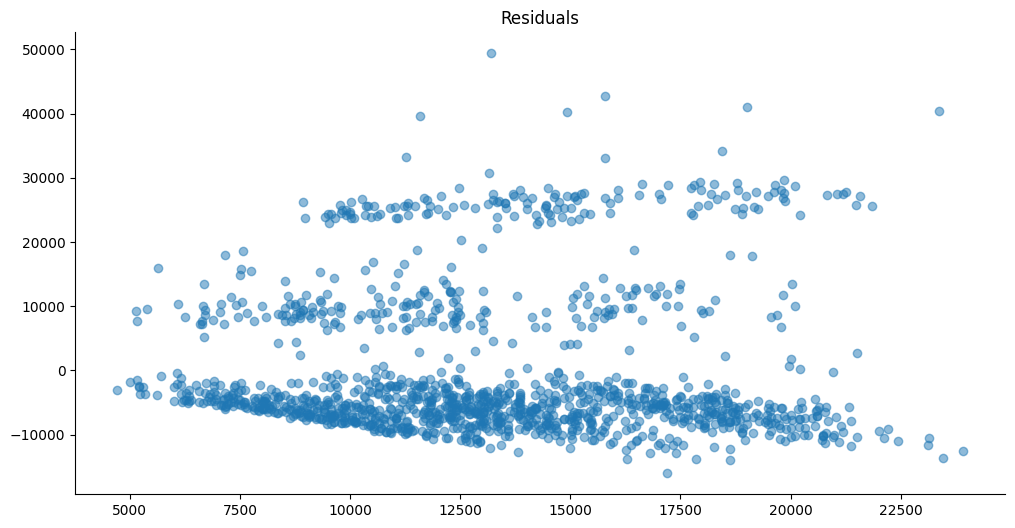

In [ ]:
# Homoscedasticity

# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=insurance_data.predictions, y=insurance_data.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

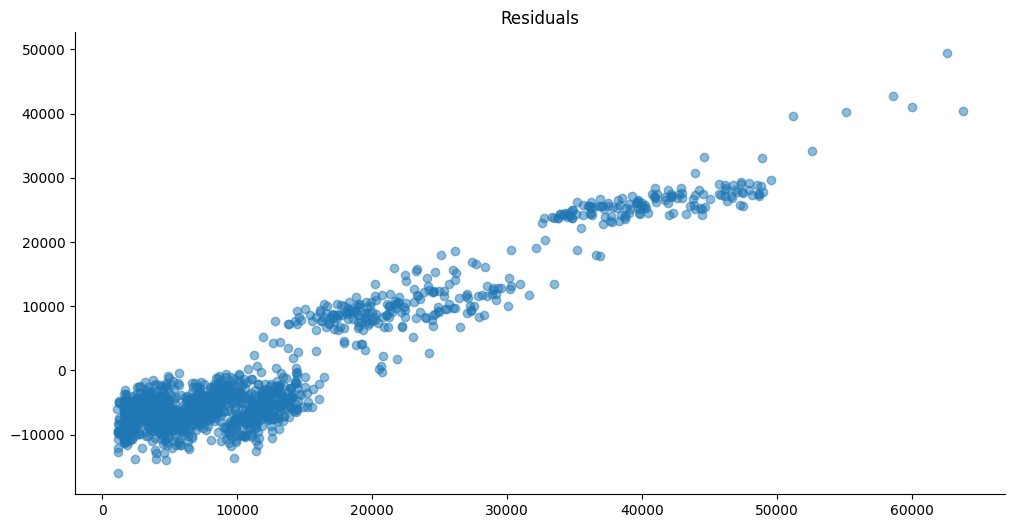

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=insurance_data.charges, y=insurance_data.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

The first residual plot (predicted values vs residuals) shows that the spread of residuals is not constant. There are around three clusters with varying levels of spread. The homoscedasticity assumption is violated because the variance of the residuals is not constant across different levels of predictions.

The second residual plot (actual charges vs residuals) shows a strong upward trend, which is a sign that the residuals are not randomly distributed, but increase as the actual charges increase.

The model may not be capturing the true relationship between the variables well. To solve this issue, you could perform  a transformation of the dependent variable or try a different modeling approach.

In [ ]:
# Heteroscedasticity robust standard errors
# Fit the linear regression model
model = smf.ols(formula= 'charges ~ age_group + bmi', data=insurance_data)
results = model.fit(cov_type = "HC3") # using heteroscedasticity robust standard errors


# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     50.85
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.08e-31
Time:                        12:41:10   Log-Likelihood:                -14404.
No. Observations:                1338   AIC:                         2.882e+04
Df Residuals:                    1334   BIC:                         2.884e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

HC3 computes a heteroscedasticity robust covariance matrix and uses this matrix for the estimation. The Standard Errors are heteroscedasticity robust (HC3). This robust approach gives more confidence in the model's results because it balances out potential issues with uneven variance in the residuals.

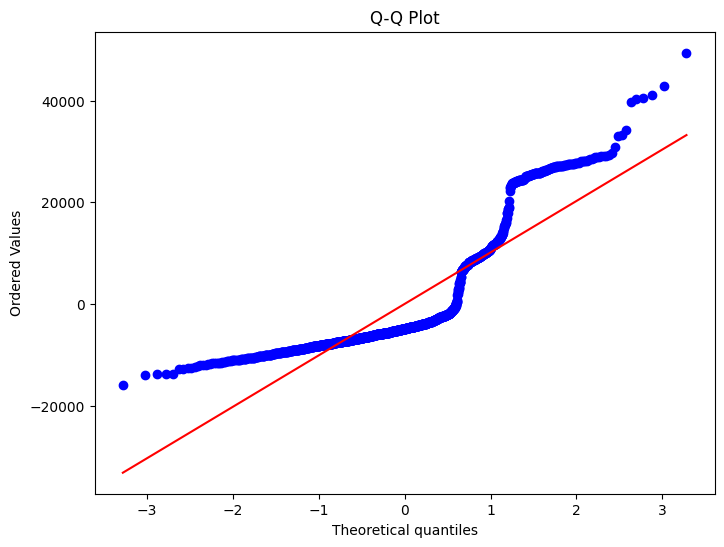

In [ ]:
# Normality of Residuals
import scipy.stats as stats

# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(insurance_data['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot shows that the residuals for smaller and moderate values (close to the center of the plot) almost follow a normal distribution, because they are near the red line. However, the larger residuals (both above 1 and below -1) are further away from the line. This indicates that the residuals for extreme observations are not normally distributed, which means that the model has difficulties to fit larger or more extreme values.

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor                   features
0   28.041229                  Intercept
1    1.225907       age_group[T.Seniors]
2    1.222735  age_group[T.Young adults]
3    1.013271                        bmi


We need to test if some variables are linear combinations of other variables. To do so, we compute the variance inflation factor (VIF).
The VIF for all variables is below the threshold of 10 and even below the more conservative threshold of 5. That shows that multicollinearity is not an issue.

In [ ]:
# Independence of Errors (autocorrelation of errors)
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(insurance_data['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.0096410685044286


The Durbin-Watson test checks for autocorrelation in residuals. Values between 1.5 and 2.5 are acceptable. Since the result is 2.0096410685044286, the value is acceptable and there is no autocorrelation of errors.

After checking the assumptions for linear regression, you can summarize that there are some potential violations, e. g. in homoscedasticity or normality of residuals. However, the model can still be used because linear regression is relatively robust to minor assumption violations, especially with large sample sizes like in this dataset. Overall, the model provides valuable insights, is easy to interpret and the conclusions remain reliable for practical purposes.

# Conclusion

Our analysis revealed that smoking status and age are both significant predictors of insurance charges. Smokers consistently face substantially higher costs than non-smokers, and older individuals tend to have higher charges compared to younger individuals. While BMI showed a positive association with insurance charges, its impact was less pronounced than that of smoking and age.

These findings underscore the importance of public health initiatives to reduce smoking rates and promote healthy lifestyles. Insurance providers can leverage this information to develop more accurate pricing models and risk assessments. Future research could explore the interaction effects of smoking, BMI, and other factors on insurance charges to gain a more comprehensive understanding of these relationships.

One limitation of the chosen approach is the exclusion of certain variables, such as geographic region and number of children, which may introduce unaccounted variations in insurance charges. For instance, healthcare costs can differ significantly by region due to differences in healthcare infrastructure or cost of living. Additionally, family size and the number of dependents covered by an insurance plan could also influence the total charges, providing more context to the individual’s health-related expenses. Another limitation lies in the sole reliance on linear regression and ANOVA, which may oversimplify complex, non-linear relationships between variables like BMI and insurance costs. This is underlined by the fact that not all assumptions for a linear regression were met. Nevertheless, the models give a good overview on the general impact of the variables age, BMI and smoker on the insurance rate. Future analysis could benefit from incorporating more sophisticated modeling techniques, such as interaction terms between variables or non-linear models, to capture the nuanced interplay between smoking, age, BMI, and other factors. Furthermore, expanding the dataset to include additional socio-economic and lifestyle variables, such as income, education level, or physical activity, could provide a more comprehensive understanding of the drivers of insurance charges.